<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/09_PandasBackend/2023-02-01-Lesson21.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-11-16-11wk-2.html#자료분석-저출산>

# imports

In [1]:
import pandas as pd 
import numpy as np

# 자료분석: 저출산 

## 데이터읽기 // `pd.read_html()`

`-` 대한민국의 저출산문제

- ref: https://ko.wikipedia.org/wiki/대한민국의_저출산

`-` 위의 url에서 3,5번째 테이블을 읽고싶다. 
- 3번째 테이블: 시도별 출산율
- 5번째 테이블: 시도별 출생아 수

In [6]:
_dflst = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%80%EC%B6%9C%EC%82%B0')
_df1 = _dflst[2] 
_df2 = _dflst[4] 

In [30]:
pd.DataFrame(np.array([[1,2],[3,4]])).applymap(lambda x: x+1)

,0,1
0,2,3
1,4,5


In [ ]:
_df2

,지역/연도[6],2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서울,93266,91526,93914.000,84066.000,83711.000,83005,75.536,65389,58074,53.673,47400,45531
1,부산,27415,27759,28673.000,25831.000,26190.000,26645,24906.000,21480,19152,17049.000,15100,14446
2,대구,20557,20758,21472.000,19340.000,19361.000,19438,18298.000,15946,14400,13233.000,11200,10661
3,인천,25752,20758,21472.000,25560.000,25786.000,25491,23609.000,20445,20087,18522.000,16000,14947
4,광주,13979,13916,14392.000,12729.000,12729.000,12441,11580.000,10120,9105,8364.000,7300,7956
5,대전,14314,14808,15279.000,14099.000,13962.000,13774,12436.000,10851,9337,8410.000,7500,7414
6,울산,11432,11542,12160.000,11330.000,11556.000,11732,10910.000,9381,8149,7539.000,6600,6127
7,세종,-,-,1054.000,1111.000,1344.000,2708,3297.000,3504,3703,3819.000,3500,3570
8,경기,121753,122027,124746.000,112129.000,112.169,113495,105643.000,94088,83198,83.198,77800,76139
9,강원,12477,12408,12426.000,10980.000,10662.000,10929,10058.000,9958,8351,8283.000,7800,7357


`-` 데이터정리 

In [41]:
df1 = _df1.drop(17)\
.melt(id_vars='지역/연도[6]')\
.assign(variable = lambda df: list(map(lambda x: x[:4], df.variable)))\
.assign(value = lambda df: list(map(lambda x: None if x=='-' else float(x), df.value)))\
.set_axis(['지역','연도','출산율'],axis=1)
df1

,지역,연도,출산율
0,서울,2005,0.92
1,부산,2005,0.88
2,대구,2005,0.99
3,인천,2005,1.07
4,광주,2005,1.10
...,...,...,...
284,전북,2021,0.85
285,전남,2021,1.02
286,경북,2021,0.97
287,경남,2021,0.90


In [42]:
df2 = _df2.drop(17)\
.melt(id_vars='지역/연도[6]')\
.assign(value = lambda df: list(map(lambda x: None if x=='-' else float(x), df.value)))\
.set_axis(['지역','연도','출생아수'],axis=1)
df2

,지역,연도,출생아수
0,서울,2010,93266.0
1,부산,2010,27415.0
2,대구,2010,20557.0
3,인천,2010,25752.0
4,광주,2010,13979.0
...,...,...,...
199,전북,2021,7745.0
200,전남,2021,8430.0
201,경북,2021,12045.0
202,경남,2021,15562.0


## 시각화I: 전국 출생아수 시각화 

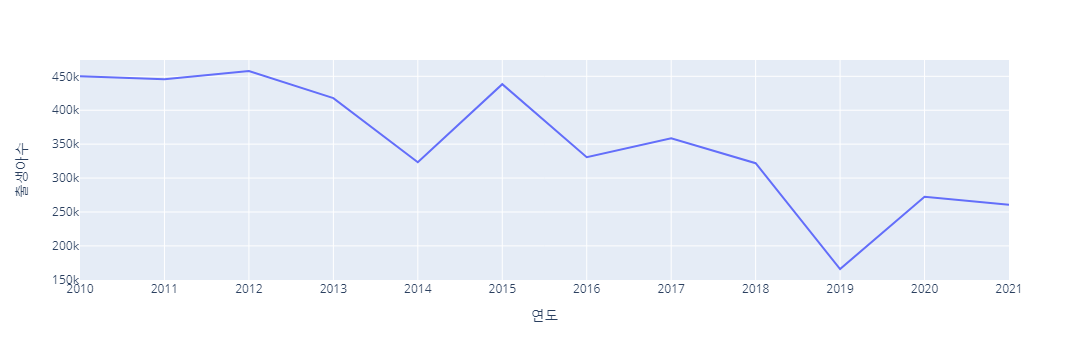

In [43]:
df2.groupby(['연도'])\
.agg({'출생아수':np.sum})\
.reset_index()\
.plot(x='연도',y='출생아수',backend='plotly')

- 일괄적으로 감소하는 느낌은 없음 

## 시각화II: 시도별 출생아수 시각화 

`-` 시각화예시1

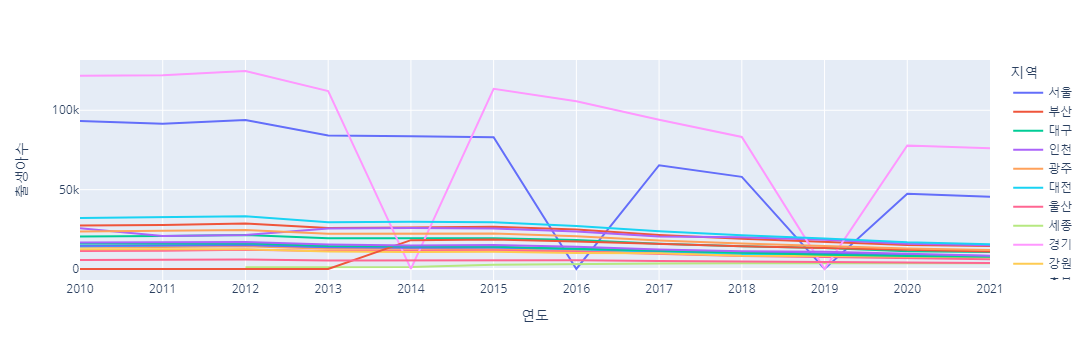

In [44]:
df2.plot.line(backend='plotly', x='연도',y='출생아수',color='지역')

- 서울과 경기가 특이함 

`-` 시각화예시2

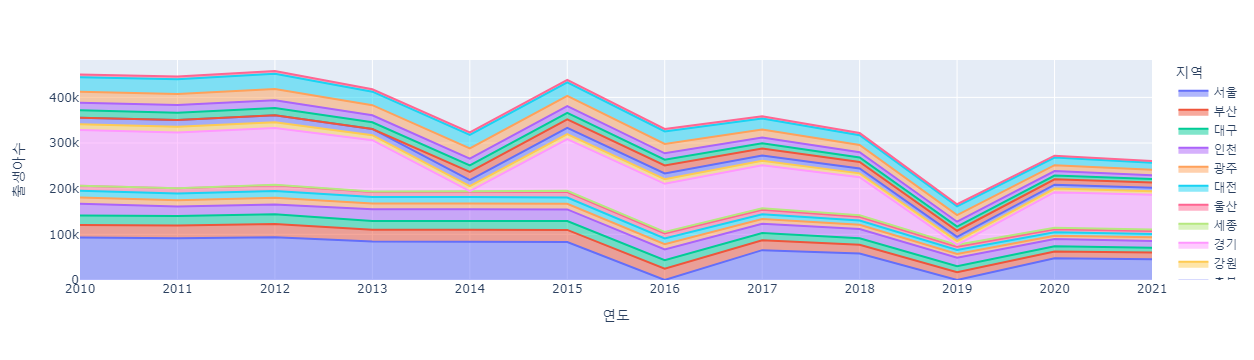

In [45]:
df2.plot.area(backend='plotly',x='연도',y='출생아수',color='지역')

- areaplot의 최상단의 선: 전국출생아수 시각화와 같음 (일괄적으로 감소하는 느낌은 별로 없음, 그 이유를 살펴보니 서울과 경기지역 떄문임) 
- areaplot의 장점: 전국출생아수를 년도별로 시각화 하는 느낌 + 각 연도를 도시별로 분해하여 해석하는 느낌

## 시각화III: 시도별 출산율 시각화 

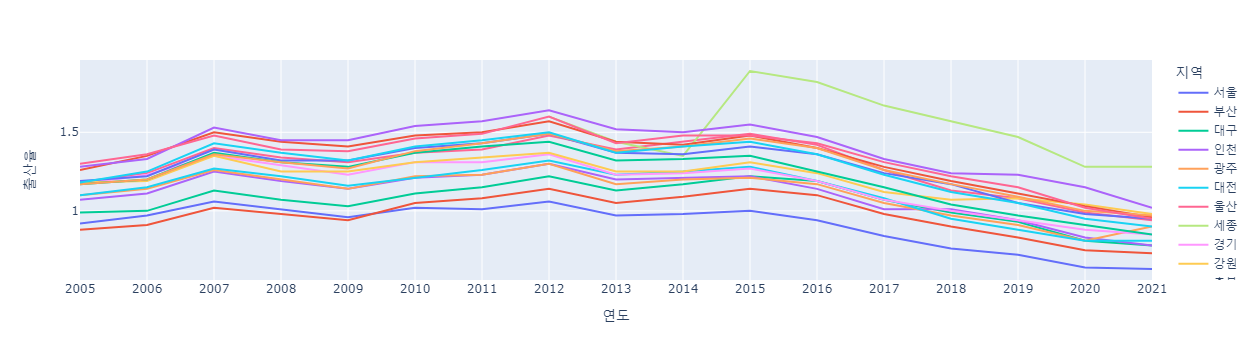

In [46]:
df1.plot.line(backend='plotly',x='연도',y='출산율',color='지역')

- 상식과 일치하는 정상적인 플랏 (출산율이 2012년 이후로 꺽이는 느낌이 든다) 
- 여기서는 서울/경기가 정상인듯 보인다. 

> 출산율의 경우 합계출산율이 크게 의미가 없으므로 areaplot은 생략한다. 

## 해석 

`-` 이상한점: 서울/경기지역에서 특정연도의 출생아수가 매우 낮음. 그런데 서울/경기지역의 출산율은 모든 년도에서 고른값을 가짐. 

`-` 해석: 데이터가 이상하다.. // 위키를 살펴보니 오타가 있음!!

## 데이터의 수정 (1): df2 상태에서 수정 

`-` df2의 수정 

In [47]:
df2.sort_values("출생아수")[:10]

,지역,연도,출생아수
62,충남,2013,18.628
11,충남,2010,20.242
28,충남,2011,20.398
45,충남,2012,20.448
153,서울,2019,53.673
102,서울,2016,75.536
161,경기,2019,83.198
76,경기,2014,112.169
41,세종,2012,1054.000
58,세종,2013,1111.000


`-` 오타로 예상되는 서울/경기/충남 이외의 가장 작은 값은 2012년 세종시인데, 이 값이 1054로 1000보다 크다. 

- 출생아수 < 1000 이면 출생아수 * 1000 을 수행하는 함수를 구현하자.

In [48]:
df2.assign(출생아수= list(map(lambda x: x*1000 if x<1000 else x, df2.출생아수)))

,지역,연도,출생아수
0,서울,2010,93266.0
1,부산,2010,27415.0
2,대구,2010,20557.0
3,인천,2010,25752.0
4,광주,2010,13979.0
...,...,...,...
199,전북,2021,7745.0
200,전남,2021,8430.0
201,경북,2021,12045.0
202,경남,2021,15562.0


`-` 잘 변환되었는지 확인하기 위한 시각화 

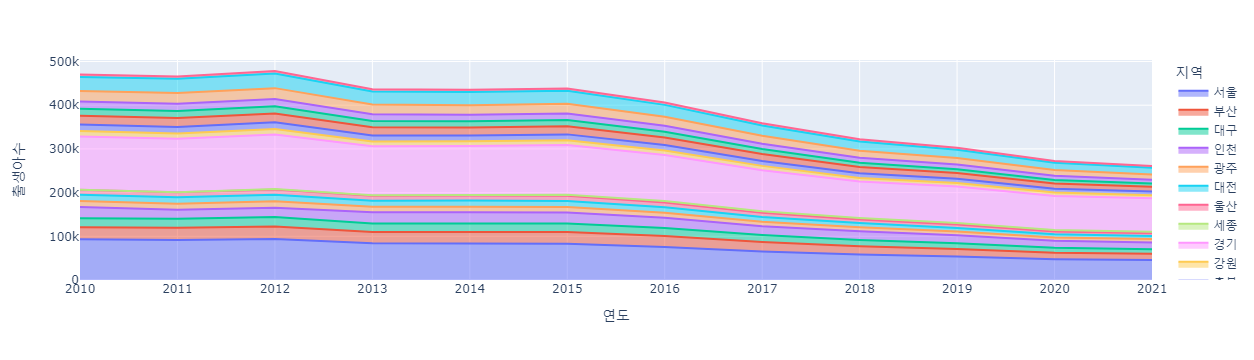

In [49]:
df2.assign(출생아수= list(map(lambda x: x*1000 if x<1000 else x, df2.출생아수)))\
.plot.area(x='연도',y='출생아수',color='지역',backend='plotly')

- 상식적인 결과: 전체출산율이 점점 낮아지고 있고 항목별로 살펴보아도 모든 도시의 출생아수가 점차 낮아지고 있음 

## 데이터의 수정 (2): _df2 상태에서 수정 

`-` applymap 

In [50]:
_df2.set_index('지역/연도[6]') # applymap을 쓰기 위해서 임시로 지역/연도[6]을 인덱스로만듬 

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
지역/연도[6],,,,,,,,,,,,
서울,93266,91526,93914.000,84066.000,83711.000,83005,75.536,65389,58074,53.673,47400,45531
부산,27415,27759,28673.000,25831.000,26190.000,26645,24906.000,21480,19152,17049.000,15100,14446
대구,20557,20758,21472.000,19340.000,19361.000,19438,18298.000,15946,14400,13233.000,11200,10661
인천,25752,20758,21472.000,25560.000,25786.000,25491,23609.000,20445,20087,18522.000,16000,14947
광주,13979,13916,14392.000,12729.000,12729.000,12441,11580.000,10120,9105,8364.000,7300,7956
대전,14314,14808,15279.000,14099.000,13962.000,13774,12436.000,10851,9337,8410.000,7500,7414
울산,11432,11542,12160.000,11330.000,11556.000,11732,10910.000,9381,8149,7539.000,6600,6127
세종,-,-,1054.000,1111.000,1344.000,2708,3297.000,3504,3703,3819.000,3500,3570
경기,121753,122027,124746.000,112129.000,112.169,113495,105643.000,94088,83198,83.198,77800,76139


`-` 방법1

In [51]:
_df2.set_index('지역/연도[6]')\
.applymap(lambda x: None if x == '-' else float(x))\
.applymap(lambda x: x*1000 if x<1000 else x)\
.drop('전국')\
.stack().reset_index()

,지역/연도[6],level_1,0
0,서울,2010,93266.0
1,서울,2011,91526.0
2,서울,2012,93914.0
3,서울,2013,84066.0
4,서울,2014,83711.0
...,...,...,...
197,제주,2017,5037.0
198,제주,2018,4781.0
199,제주,2019,4500.0
200,제주,2020,4000.0


`-` 방법2

In [52]:
df2 = _df2.set_index('지역/연도[6]')\
.applymap(lambda x: None if x == '-' else float(x))\
.applymap(lambda x: x*1000 if x<1000 else x)\
.drop('전국')\
.reset_index()\
.melt(id_vars='지역/연도[6]')\
.set_axis(['지역','연도','출생아수'],axis=1)
df2

,지역,연도,출생아수
0,서울,2010,93266.0
1,부산,2010,27415.0
2,대구,2010,20557.0
3,인천,2010,25752.0
4,광주,2010,13979.0
...,...,...,...
199,전북,2021,7745.0
200,전남,2021,8430.0
201,경북,2021,12045.0
202,경남,2021,15562.0


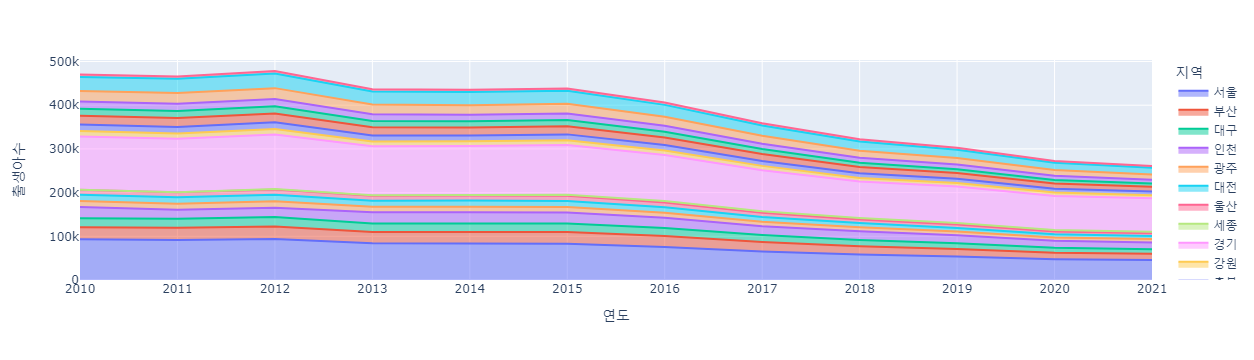

In [53]:
df2.plot.area(backend='plotly',x='연도',y='출생아수',color='지역')

## 숙제

아래와 같은 통계량을 구하라.

- $서울_{2010} = \frac{\text{2010년 서울의 출생자 수}}{\text{2010년 출생자수}}, \dots,  서울_{2021} = \frac{\text{2021년 서울의 출생자 수}}{\text{2021년 출생자수}}$

> 참고로 계산결과는 [0.198, 0.196, 0.196, 0.193, 0.192, 0.189, 0.186, 0.182, 0.18, 0.177, 0.174, 0.175] 와 같다. 

lineplot을 이용하여 아래와 같이 시각화 하라. 

(풀이)

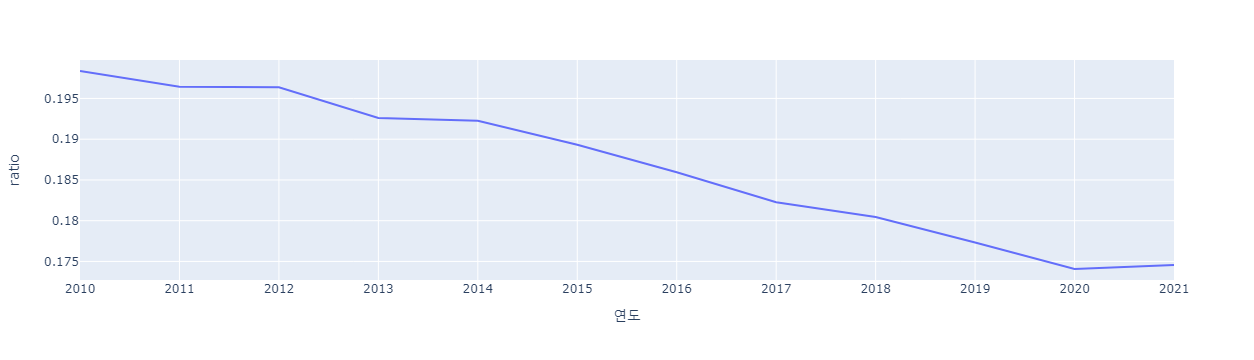

In [54]:
df2.groupby('연도')[['출생아수']].sum().reset_index().rename({'출생아수':'년도별출생아수합'},axis=1).\
merge(df2).eval('ratio = 출생아수/년도별출생아수합').query('지역=="서울"').\
plot.line(x='연도',y='ratio',backend='plotly')